In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Dataset.csv")

In [ ]:
df.head()

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN


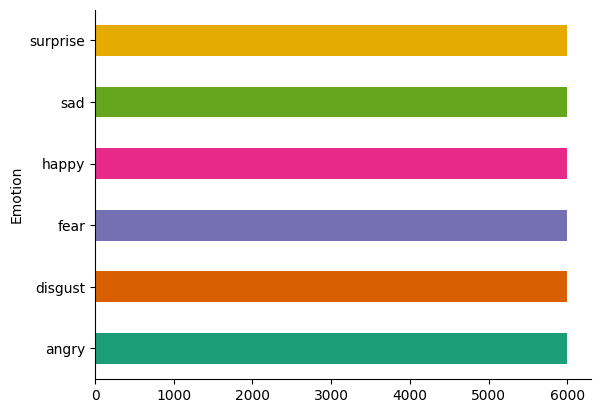

In [ ]:
# @title Emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Emotion_label'] = le.fit_transform(df['Emotion'])


In [ ]:
#drop Racial biases
df.drop(['Racial Biases'], axis=1, inplace=True)
#drop Hatred Percentage
df.drop(['Hatred Percentage',], axis=1, inplace=True)
#drop Depression Percentage
df.drop(['Depression Percentage'], axis=1, inplace=True)
#drop year
df.drop(['Year'], axis=1, inplace=True)


In [ ]:
#data preprocessing using spacy

#removing unnecessary punctuation
import re

# Data cleaning function
def process_comments(Comment):
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

df['Cleaned'] = df['Text'].apply(process_comments)
df.head()


,SL,Emotion,Text,Emotion_label,Cleaned
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...


In [ ]:
import pandas as pd

# Load Bengali stop words from a CSV file
stop_words_df = pd.read_csv('stopwords_bangla.csv')  # Assuming the CSV has one column with stop words
stop_words_df=stop_words_df.drop(['Unnamed: 0'], axis=1)
# Convert the stop words to a list
stop_words_list = stop_words_df.iloc[:, 0].tolist()  # Convert the column to a list

# Check the stop words list
print("Stop words list:", stop_words_list[:10])  # Print first 10 stop words for verification


# Function to remove stop words
def remove_stop_words(text, stop_words):
    if isinstance(text, str):  # Ensure the text is a string
        # Tokenize text (simple split for Bengali)
        words = text.split()
        # Filter out stop words
        filtered_words = [word for word in words if word not in stop_words]
        # Join words back into a single string
        return ' '.join(filtered_words)
    else:
        return text  # If text is not a string, return it as is

# Assuming 'df' is the DataFrame and 'Cleaned' is the column with text data
# Check a few entries in the original DataFrame
print("Original texts:", df['Cleaned'].head())

# Apply the function to the DataFrame
df['filtered_text'] = df['Cleaned'].apply(lambda x: remove_stop_words(x, stop_words_list))


df.head()

Stop words list: ['অই', 'অগত্যা', 'অত: পর', 'অতএব', 'অথচ', 'অথবা', 'অধিক', 'অধীনে', 'অধ্যায়', 'অনুগ্রহ']
Original texts: 0    নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1    জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2                                     ভেজাল নির্বাচন  
3    বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4    সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল  এ...
Name: Cleaned, dtype: object


,SL,Emotion,Text,Emotion_label,Cleaned,filtered_text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,1,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভোট ব...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,1,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,জনগণ মনের আনন্দে ভোট কাস্ট দেশদ্রোহী পেট্রল বো...
2,3,angry,ভেজাল নির্বাচন ।,0,ভেজাল নির্বাচন,ভেজাল নির্বাচন
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,3,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,বিএনপি রাজাকার সমর্থকরা হেরে দেশের আমিও সন্তুষ...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",0,সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল এ...,সূক্ষ্ম কারচুপি এতদিন একটা কথার কথা বাস্তব রূপ...


In [ ]:
!pip install --upgrade pip
!pip install --upgrade tensorflow torch transformers


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

# Load dataset

data = df

# Ensure balanced dataset with up to 100 samples per emotion
data = data.groupby('Emotion').apply(lambda x: x.sample(n=min(len(x), 1500), random_state=42)).reset_index(drop=True)

# Split the dataset into features and labels
X = data['filtered_text']
y = data['Emotion']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load BanglaBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglabert")
model = AutoModel.from_pretrained("csebuetnlp/banglabert")

# Function to generate embeddings using BanglaBERT
def generate_embeddings(texts):
    encoded_input = tokenizer(texts, padding=True, truncation=True, return_tensors='pt', max_length=512)
    with torch.no_grad():
        model_output = model(**encoded_input)
    embeddings = model_output["last_hidden_state"].mean(dim=1).numpy()  # Mean pooling
    return embeddings

# Generate embeddings for training and test sets
print("Generating embeddings for training set...")
X_train_embeddings = generate_embeddings(X_train.tolist())
print("Generating embeddings for test set...")
X_test_embeddings = generate_embeddings(X_test.tolist())

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_embeddings, y_train)

# Make predictions
y_pred = clf.predict(X_test_embeddings)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
<ipython-input-10-38b26daba022>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('Emotion').apply(lambda x: x.sample(n=min(len(x), 1500), random_state=42)).reset_index(drop=True)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist 

tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Generating embeddings for training set...
Generating embeddings for test set...
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       300
           1       0.79      0.69      0.74       285
           2       0.87      0.77      0.82       299
           3       0.68      0.72      0.70       302
           4       0.49      0.48      0.48       310
           5       0.72      0.79      0.75       304

    accuracy                           0.68      1800
   macro avg       0.69      0.68      0.69      1800
weighted avg       0.69      0.68      0.68      1800

Accuracy: 0.6827777777777778


In [ ]:

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       300
           1       0.79      0.69      0.74       285
           2       0.87      0.77      0.82       299
           3       0.68      0.72      0.70       302
           4       0.49      0.48      0.48       310
           5       0.72      0.79      0.75       304

    accuracy                           0.68      1800
   macro avg       0.69      0.68      0.69      1800
weighted avg       0.69      0.68      0.68      1800

Accuracy: 0.6827777777777778


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming X_train_embeddings, X_test_embeddings, y_train, and y_test are already defined

# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train_embeddings, y_train)
y_pred_rf = clf_rf.predict(X_test_embeddings)
print("Random Forest:\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# k-Nearest Neighbors
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_embeddings, y_train)
y_pred_knn = clf_knn.predict(X_test_embeddings)
print("\nk-Nearest Neighbors:\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train_embeddings, y_train)
y_pred_nb = clf_nb.predict(X_test_embeddings)
print("\nNaive Bayes:\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# Linear Regression
clf_lr = LinearRegression()
clf_lr.fit(X_train_embeddings, y_train)
y_pred_lr = np.round(clf_lr.predict(X_test_embeddings)).astype(int)  # Round and convert to integer labels
print("\nLinear Regression:\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Logistic Regression
clf_logreg = LogisticRegression(max_iter=1000, random_state=42)
clf_logreg.fit(X_train_embeddings, y_train)
y_pred_logreg = clf_logreg.predict(X_test_embeddings)
print("\nLogistic Regression:\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Random Forest:

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       300
           1       0.79      0.69      0.74       285
           2       0.87      0.77      0.82       299
           3       0.68      0.72      0.70       302
           4       0.49      0.48      0.48       310
           5       0.72      0.79      0.75       304

    accuracy                           0.68      1800
   macro avg       0.69      0.68      0.69      1800
weighted avg       0.69      0.68      0.68      1800

Accuracy: 0.6827777777777778

k-Nearest Neighbors:

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.45      0.39       300
           1       0.44      0.58      0.50       285
           2       0.44      0.52      0.48       299
           3       0.47      0.38      0.42       302
           4       0.37      0.24      0.29       310
           5      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py


Logistic Regression:

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.44      0.42       300
           1       0.46      0.44      0.45       285
           2       0.49      0.53      0.51       299
           3       0.59      0.50      0.54       302
           4       0.32      0.28      0.30       310
           5       0.50      0.57      0.53       304

    accuracy                           0.46      1800
   macro avg       0.46      0.46      0.46      1800
weighted avg       0.46      0.46      0.46      1800

Accuracy: 0.4583333333333333


In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_embeddings, y_train)
y_pred_svm = clf_svm.predict(X_test_embeddings)
print("\nSupport Vector Machine:\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))



Support Vector Machine:

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.32      0.30       300
           1       0.30      0.27      0.28       285
           2       0.27      0.27      0.27       299
           3       0.54      0.30      0.38       302
           4       0.23      0.19      0.21       310
           5       0.31      0.48      0.38       304

    accuracy                           0.30      1800
   macro avg       0.32      0.30      0.30      1800
weighted avg       0.32      0.30      0.30      1800

Accuracy: 0.30444444444444446


In [ ]:
!pip install --upgrade pip
!pip install --upgrade tensorflow torch transformers


In [ ]:
import logging
logging.basicConfig(level=logging.DEBUG)


In [ ]:
from transformers import pipeline

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForPreTraining

tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglabert")
model = AutoModelForPreTraining.from_pretrained("csebuetnlp/banglabert")

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.nn import functional as F
from torch.optim import AdamW
from transformers import get_scheduler

In [ ]:
# Encode labels to numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and validation
x_train, x_val, y_train, y_val = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

NameError: name 'x' is not defined